In [30]:
import typing as tp

import numpy as np
import scipy.stats as sta

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [5]:
sns.set_style('darkgrid') 
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=14)    
plt.rc('xtick', labelsize=13)   
plt.rc('ytick', labelsize=13)    
plt.rc('legend', fontsize=13)    
plt.rc('font', size=13)         

# Discrete two-dimensional random variable generator

In [31]:
class Discrete2DRvGenerator:
    def __init__(self, probability_matrix: np.array, first_rv_values: np.array, second_rv_values: np.array) -> None:
        row_sums = np.sum(probability_matrix, axis=1)
        self._row_sums_cumsum = np.cumsum(row_sums)
        self._row_cumsums = np.cumsum(probability_matrix, axis=1) / row_sums.reshape(-1, 1)
        
        self._first_rv_values = first_rv_values
        self._second_rv_values = second_rv_values
    
    def __next__(self) -> tp.Tuple[float, float]:
        first_uniform_rv, second_uniform_rv = np.random.uniform(size=2)
        first_rv_value_index = np.searchsorted(self._row_sums_cumsum, first_uniform_rv)
        second_rv_value_index = np.searchsorted(self._row_cumsums[first_rv_value_index], second_uniform_rv)

        return self._first_rv_values[first_rv_value_index], self._second_rv_values[second_rv_value_index]

# Statistical analysis

## Define discrete two-dimensional random variable

In [7]:
probability_matrix = np.array([[0.1, 0.4, 0.1], [0.1, 0.1, 0.2]])
first_rv_values = np.array([1, 2])
second_rv_values = np.array([3, 4, 5])

In [8]:
discrete_2d_rv_generator = Discrete2DRvGenerator(probability_matrix, first_rv_values, second_rv_values)

## Empirical probability matrix

In [9]:
def compute_empirical_probability_matrix(discrete_2d_rv_generator: Discrete2DRvGenerator, first_rv_values: np.array,
                                         second_rv_values: np.array, samples_amount: int):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    counter = Counter(samples)
    
    empirical_probability_matrix = np.zeros((first_rv_values.size, second_rv_values.size))
    
    for (first_rv_value, second_rv_value), сount in counter.items():
        first_rv_value_index = np.where(first_rv_values==first_rv_value)
        second_rv_value_index = np.where(second_rv_values==second_rv_value)
        
        empirical_probability_matrix[first_rv_value_index, second_rv_value_index] = сount / samples_amount
    return empirical_probability_matrix

In [10]:
empirical_probability_matrix = compute_empirical_probability_matrix(discrete_2d_rv_generator, first_rv_values,
                                                                    second_rv_values, 10000)

In [11]:
def plot_empirical_and_theoretical_probability_matrices(empirical_probability_matrix: np.array,
                                                       theoretical_probability_matrix: np.array):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_title('Empirical probability matrix')
    sns.heatmap(empirical_probability_matrix, xticklabels=second_rv_values, yticklabels=first_rv_values, ax=ax1)

    ax2.set_title('Theoretical probability matrix')
    sns.heatmap(theoretical_probability_matrix, xticklabels=second_rv_values, yticklabels=first_rv_values, ax=ax2);

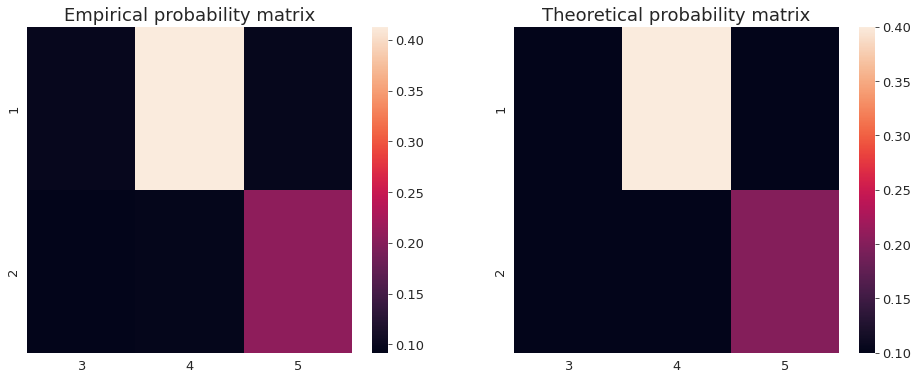

In [12]:
plot_empirical_and_theoretical_probability_matrices(empirical_probability_matrix, probability_matrix)

## Two-dimensional random variable components histograms

In [13]:
def plot_random_variable_components_histograms(discrete_2d_rv_generator: Discrete2DRvGenerator, first_rv_values: np.array,
                                               second_rv_values: np.array, samples_amount: int):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    
    first_rv_samples = [sample[0] for sample in samples]
    first_rv_values, first_rv_counts = np.unique(first_rv_samples, return_counts=True)

    second_rv_samples = [sample[1] for sample in samples]
    second_rv_values, second_rv_counts = np.unique(second_rv_samples, return_counts=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.set_title('First random value histogram')
    ax1.vlines(first_rv_values, 0, first_rv_counts / len(first_rv_samples))
    
    
    ax2.set_title('Second random value histogram')
    ax2.vlines(second_rv_values, 0, second_rv_counts / len(second_rv_samples), )

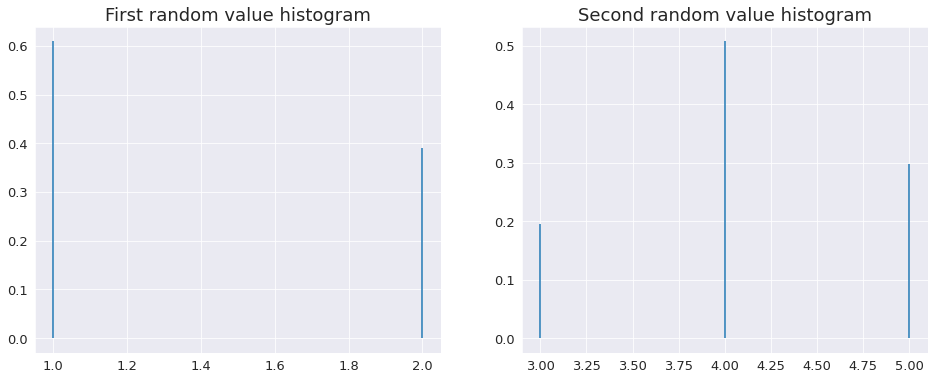

In [14]:
plot_random_variable_components_histograms(discrete_2d_rv_generator, first_rv_values, second_rv_values, 10000)

## Point estimations

In [15]:
def compute_theoretical_expectation(probability_matrix: np.array, first_rv_values: np.array, second_rv_values: np.array):
    row_sums = np.sum(probability_matrix, axis=1)
    column_sums = np.sum(probability_matrix, axis=0)
    return np.sum(row_sums * first_rv_values), np.sum(column_sums * second_rv_values)

def compute_expectation_estimation(discrete_2d_rv_generator: Discrete2DRvGenerator, samples_amount: int):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    return np.mean([sample[0] for sample in samples]), np.mean([sample[1] for sample in samples])

In [16]:
compute_theoretical_expectation(probability_matrix, first_rv_values, second_rv_values)

(1.4, 4.1000000000000005)

In [17]:
compute_expectation_estimation(discrete_2d_rv_generator, 10000)

(1.4039, 4.0949)

In [18]:
def compute_theoretical_variance(probability_matrix: np.array, first_rv_values: np.array, second_rv_values: np.array):
    row_sums = np.sum(probability_matrix, axis=1)
    column_sums = np.sum(probability_matrix, axis=0)
    return np.sum(row_sums * (first_rv_values ** 2)) - np.sum(row_sums * first_rv_values) ** 2, \
        np.sum(column_sums * (second_rv_values ** 2)) - np.sum(column_sums * second_rv_values) ** 2

def compute_variance_estimation(discrete_2d_rv_generator: Discrete2DRvGenerator, samples_amount: int):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    return np.var([sample[0] for sample in samples], ddof=1), np.var([sample[1] for sample in samples], ddof=1)

In [19]:
compute_theoretical_variance(probability_matrix, first_rv_values, second_rv_values)

(0.24000000000000044, 0.4899999999999949)

In [20]:
compute_variance_estimation(discrete_2d_rv_generator, 10000)

(0.2401635263526352, 0.496965286528653)

## Interval estimations

In [21]:
def compute_confidence_interval_expectation(rv_values: np.array, normal_quantile: float):
    rv_mean = np.mean(rv_values)
    rv_var = np.var(rv_values, ddof=1)
    
    return rv_mean - np.sqrt(rv_var / rv_values.size) * normal_quantile, \
        rv_mean + np.sqrt(rv_var / rv_values.size) * normal_quantile

def compute_confidence_intervals_expectation(discrete_2d_rv_generator: Discrete2DRvGenerator, 
                                             samples_amount: int, confidence_level = 0.95):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    
    first_rv_values = np.array([sample[0] for sample in samples])
    second_rv_values = np.array([sample[1] for sample in samples])
    normal_quantile = sta.norm.ppf((1 + confidence_level) / 2)
    
    return compute_confidence_interval_expectation(first_rv_values, normal_quantile), \
        compute_confidence_interval_expectation(second_rv_values, normal_quantile)

In [22]:
compute_confidence_intervals_expectation(discrete_2d_rv_generator, 100000)

((1.3980522504730073, 1.4041277495269926),
 (4.092766989765011, 4.101453010234988))

In [23]:
def compute_bootstrap_variance_estimation_of_variance_estimate(rv_values: np.array, b: int):
    return np.var([np.var(np.random.choice(rv_values, rv_values.size), ddof=1) for _ in range(b)], ddof=1)

def compute_confidence_interval_variance(rv_values: np.array, normal_quantile: float):
    rv_var = np.var(rv_values, ddof=1)
    rv_var_estimation_var = compute_bootstrap_variance_estimation_of_variance_estimate(rv_values, 1000)
    
    return rv_var - np.sqrt(rv_var_estimation_var) * normal_quantile, \
        rv_var + np.sqrt(rv_var_estimation_var) * normal_quantile

def compute_confidence_intervals_variance(discrete_2d_rv_generator: Discrete2DRvGenerator, 
                                             samples_amount: int, confidence_level = 0.95):
    samples = [next(discrete_2d_rv_generator) for _ in range(samples_amount)]
    
    first_rv_values = np.array([sample[0] for sample in samples])
    second_rv_values = np.array([sample[1] for sample in samples])
    normal_quantile = sta.norm.ppf((1 + confidence_level) / 2)
    
    return compute_confidence_interval_variance(first_rv_values, normal_quantile), \
        compute_confidence_interval_variance(second_rv_values, normal_quantile)

In [24]:
compute_confidence_intervals_variance(discrete_2d_rv_generator, 10000)

((0.2380773355218724, 0.2418905812698066),
 (0.4785470495217629, 0.4984977749606853))

## Correlation coefficient

In [25]:
def compute_theoretical_correlation_coefficient(probability_matrix: np.array, 
                                                first_rv_values: np.array, second_rv_values: np.array):
    first_rv_expectation, second_expectation = compute_theoretical_expectation(probability_matrix, first_rv_values, second_rv_values)
    first_rv_variance, second_rv_variance = compute_theoretical_variance(probability_matrix, first_rv_values, second_rv_values)
    
    covariance_coefficient = np.sum(probability_matrix * first_rv_values.reshape(-1, 1) * second_rv_values.reshape(1, -1)) - first_rv_expectation * second_expectation
    return covariance_coefficient / np.sqrt(first_rv_variance * second_rv_variance)

def compute_correlation_coefficient_estimation(discrete_2d_rv_generator: Discrete2DRvGenerator, samples_amount: int, ):
    samples = np.array([next(discrete_2d_rv_generator) for _ in range(samples_amount)])
    
    first_rv_values = samples[:, 0] 
    first_rv_var = np.var(first_rv_values, ddof=1)
    second_rv_values = samples[:, 1]
    second_rv_var = np.var(second_rv_values, ddof=1)

    covariance_coefficient = (first_rv_values - np.mean(first_rv_values)) @ (second_rv_values - np.mean(second_rv_values)) / (samples_amount - 1)
    return covariance_coefficient / np.sqrt(first_rv_var * second_rv_var)

In [26]:
compute_theoretical_correlation_coefficient(probability_matrix, first_rv_values, second_rv_values)

0.1749635530559435

In [27]:
compute_correlation_coefficient_estimation(discrete_2d_rv_generator, 10000)

0.15803717423566682

## Statistical tests

In [32]:
def compute_chi_square_statistics(theoretical_probability_matrix: np.array, discrete_2d_rv_generator: Discrete2DRvGenerator,
                                  first_rv_values: np.array, second_rv_values: np.array, samples_amount: int):
    emperical_probability_matrix = compute_empirical_probability_matrix(discrete_2d_rv_generator, first_rv_values,
                                                                        second_rv_values, samples_amount)
    
    return samples_amount * np.sum((emperical_probability_matrix - theoretical_probability_matrix) ** 2 / theoretical_probability_matrix)
    
    
def chi_square_test(theoretical_probability_matrix: np.array, discrete_2d_rv_generator: Discrete2DRvGenerator,
                    first_rv_values: np.array, second_rv_values: np.array, samples_amount: int, confidence_level = 0.05):
    chi_square_statistics = compute_chi_square_statistics(theoretical_probability_matrix, discrete_2d_rv_generator,
                                                          first_rv_values, second_rv_values, samples_amount)
    
    p_value = 1 - sta.chi2.cdf(chi_square_statistics, theoretical_probability_matrix.size - 1)
    return p_value, p_value > confidence_level

In [ ]:
chi_square_test(probability_matrix, discrete_2d_rv_generator, first_rv_values, second_rv_values, 1000)

(0.8770464235218929, True)